# LCA OWM in Montreal

# 1. Setup project

In [1]:
import brightway2 as bw
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import stats_arrays as sa

In [2]:
bw.projects.set_current('OWM LCA')

# 2. Database import 

Note: only have to do once or if you want to load an updated database

Import ecoinvent

In [ ]:
bw.import_ecoinvent_release('3.9.1', 'cutoff','USERNAME', 'PASSWORD')

Import own data

In [4]:
#import general facilities database
imp = bw.ExcelImporter(r"Canada OWM Facilities Database.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.9.1-cutoff", fields=('name', 'unit', 'location', 'reference product')) 
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 4 worksheets in 0.09 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 5.91 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: link_iterable_by_fields
34 datasets
378 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-OWM-Facilities-unlinked.xlsx


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/16/2025 15:13:58
  Finished: 10/16/2025 15:13:58
  Total time elapsed: 00:00:00
  CPU %: 100.20
  Memory %: 1.77
Created database: OWM Facilities


In [5]:
#import general scenarios database
imp = bw.ExcelImporter(r"Scenarios Database_Final.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("OWM Facilities", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 4 worksheets in 0.06 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 5.85 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
3 datasets
30 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-Scenarios-unlinked.xlsx


0% [###] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/16/2025 15:14:08
  Finished: 10/16/2025 15:14:08
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.62
Created database: Scenarios


In [56]:
#import infrastructure sensitivity facilities database
imp = bw.ExcelImporter(r"Infrastructure Sensitivity Facilities.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.9.1-cutoff", fields=('name', 'unit', 'location', 'reference product')) 
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 1 worksheets in 0.08 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 5.88 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: link_iterable_by_fields
12 datasets
147 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-Infrastructure-sensitivity-unlinked.xlsx


0% [############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/13/2025 15:53:27
  Finished: 10/13/2025 15:53:27
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.06
Created database: Infrastructure sensitivity


In [57]:
#import infrastructure scenarios database
imp = bw.ExcelImporter(r"Scenarios infrastructure.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("Infrastructure sensitivity", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 5.72 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
3 datasets
30 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-Scenarios-infrastructure-unlinked.xlsx


0% [###] 100% | ETA: 00:00:01
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/13/2025 15:53:36
  Finished: 10/13/2025 15:53:36
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.01
Created database: Scenarios infrastructure


In [6]:
#import biogas sensitivity facilities database
imp = bw.ExcelImporter(r"SA Canada OWM Facilities Database.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.9.1-cutoff", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 5 worksheets in 0.10 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.10 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: link_iterable_by_fields
38 datasets
404 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-SA-OWM-Facilities-unlinked.xlsx


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/14/2025 09:57:26
  Finished: 10/14/2025 09:57:26
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.71
Created database: SA OWM Facilities


In [7]:
#import biogas sensitivity scenarios database
imp = bw.ExcelImporter(r"SA Scenarios Database.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("SA OWM Facilities", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.02 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
6 datasets
60 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-SA-Scenarios-unlinked.xlsx


0% [######] 100% | ETA: 00:00:01
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/14/2025 09:57:40
  Finished: 10/14/2025 09:57:40
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.60
Created database: SA Scenarios


In [8]:
#import no substitution scenario database
imp = bw.ExcelImporter(r"Canada OWM Facilities Database_no substitution.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.9.1-cutoff", fields=('name', 'unit', 'location', 'reference product')) 
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 1 worksheets in 0.05 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.78 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: link_iterable_by_fields
13 datasets
120 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-OWM-Facilities-no-substitution-unlinked.xlsx


0% [#############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/20/2025 14:00:34
  Finished: 10/20/2025 14:00:34
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.61
Created database: OWM Facilities no substitution


In [9]:
#import scenarios no substitution database
imp = bw.ExcelImporter(r"Scenarios no substitution.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("OWM Facilities no substitution", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.88 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
3 datasets
30 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\smacdo55\AppData\Local\pylca\Brightway3\OWM-LCA.26f55f737af843ea9f9cc432ef022a9a\output\db-matching-Scenarios-no-substitution-unlinked.xlsx


0% [###] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/20/2025 14:00:51
  Finished: 10/20/2025 14:00:51
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.57
Created database: Scenarios no substitution


In [6]:
#check if it imported properly
list(bw.databases)

['ecoinvent-3.9.1-biosphere',
 'ecoinvent-3.9.1-cutoff',
 'Scenarios no substitution',
 'OWM Facilities no substitution',
 'Infrastructure sensitivity',
 'Scenarios infrastructure',
 'SA OWM Facilities',
 'SA Scenarios',
 'OWM Facilities',
 'Scenarios']

In [7]:
# to delete a database
del bw.databases['OWM Facilities no substitution']

# 3. Set up scenarios

In [3]:
# Compare general past, present, future scenarios
LCAdb =  bw.Database('Scenarios')
S1 = [a for a in LCAdb if 'S1_2022' in a ['name']]
S2 = [a for a in LCAdb if 'S2_2024' in a ['name']]
S3 = [a for a in LCAdb if 'S3_future ideal' in a ['name']]
acts = S1[0], S2[0], S3[0]
acts

('S1_2022' (tonne, CA-QC, None),
 'S2_2024' (tonne, CA-QC, None),
 'S3_future ideal' (tonne, CA-QC, None))

In [5]:
#compare AD processes
LCAdb = bw.Database('OWM Facilities')
AD_calorific_value = [a for a in LCAdb if 'AD_city' in a ['name']]
AD_biogas_upgrading= [a for a in LCAdb if 'AD_with biogas upgrading' in a ['name']]
acts = AD_calorific_value[0],AD_biogas_upgrading[0]

In [36]:
#Compare biogas sensitivity scenarios for AD and Landfill facilities
LCAdb = bw.Database('OWM Facilities')
AD = [a for a in LCAdb if 'AD_city' in a ['name']]
Landfill = [a for a in LCAdb if 'Landfill_terrebonne_HOC' in a ['name']]
LCAdbSA =  bw.Database('SA OWM Facilities')
AD_high = [a for a in LCAdbSA if 'AD_city_high' in a ['name']]
AD_low = [a for a in LCAdbSA if 'AD_city_low' in a ['name']]
Landfill_high = [a for a in LCAdbSA if 'Landfill_terrebonne_HOC_high' in a ['name']]
Landfill_low = [a for a in LCAdbSA if 'Landfill_terrebonne_HOC_low' in a ['name']]
acts = Landfill[0], AD[0], AD_high[0], AD_low[0], Landfill_high[0], Landfill_low[0]
acts

('Landfill_terrebonne_HOC' (tonne, CA-QC, None),
 'AD_city' (tonne, CA-QC, None),
 'AD_city_high' (tonne, CA-QC, None),
 'AD_city_low' (tonne, CA-QC, None),
 'Landfill_terrebonne_HOC_high' (tonne, CA-QC, None),
 'Landfill_terrebonne_HOC_low' (tonne, CA-QC, None))

In [55]:
#S3 comparison biogas sensitivity
LCAdb =  bw.Database('Scenarios')
S1 = [a for a in LCAdb if 'S1_2022' in a ['name']]
#S2 = [a for a in LCAdb if 'S2_2024' in a ['name']]
#S3 = [a for a in LCAdb if 'S3_future ideal' in a ['name']]
LCAdbSA =  bw.Database('SA Scenarios')
#S3_high = [a for a in LCAdbSA if 'S3_high' in a ['name']]
#S2_high = [a for a in LCAdbSA if 'S2_high' in a ['name']]
S1_high = [a for a in LCAdbSA if 'S1_high' in a ['name']]
#S3_low = [a for a in LCAdbSA if 'S3_low' in a ['name']]
#S2_low = [a for a in LCAdbSA if 'S2_low' in a ['name']]
S1_low = [a for a in LCAdbSA if 'S1_low' in a ['name']]
acts = S1_low[0], S1[0], S1_high[0]
acts

('S1_low' (tonne, CA-QC, None),
 'S1_2022' (tonne, CA-QC, None),
 'S1_high' (tonne, CA-QC, None))

In [10]:
# Compare scenarios with no substitution
LCAdb =  bw.Database('Scenarios no substitution')
S1 = [a for a in LCAdb if 'S1_2022' in a ['name']]
S2 = [a for a in LCAdb if 'S2_2024' in a ['name']]
S3 = [a for a in LCAdb if 'S3_future ideal' in a ['name']]
acts = S1[0], S2[0], S3[0]
acts

('S1_2022' (tonne, CA-QC, None),
 'S2_2024' (tonne, CA-QC, None),
 'S3_future ideal' (tonne, CA-QC, None))

In [58]:
# Compare scenarios with infrastructure sensitivity
LCAdb =  bw.Database('Scenarios infrastructure')
S1 = [a for a in LCAdb if 'S1_2022' in a ['name']]
S2 = [a for a in LCAdb if 'S2_2024' in a ['name']]
S3 = [a for a in LCAdb if 'S3_future ideal' in a ['name']]
acts = S1[0], S2[0], S3[0]
acts

('S1_2022' (tonne, CA-QC, None),
 'S2_2024' (tonne, CA-QC, None),
 'S3_future ideal' (tonne, CA-QC, None))

# 4. Choose an impact assessment method

In [4]:
# for single impact LCA 
mymethods = [m for m in bw.methods if 'IPCC 2021' in str(m) and not 'LT' in str(m) and 'GWP100' in str(m) and 'climate change' in str(m) and not 'biogenic' in str(m) and not 'fossil' in str(m) and not 'land use' in str(m) and not 'SLCFs' in str(m)]
mymethods

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)')]

In [ ]:
#for comparing multiple impacts, not done in the thesis but possible
climate_change = [m for m in bw.methods if 'EF v3.1' in str(m) and not 'LT' in str(m) and 'climate change' in str(m) and 'global warming potential (GWP100)' in str(m) and not 'EN15804' in str(m) and not 'biogenic' in str(m) and not 'land' in str(m) and not 'fossil' in str(m)]#climate_change_biogenic = [m for m in bw.methods if 'EF v3.1' in str(m) and not 'LT' in str(m) and 'climate change: biogenic' in str(m) and 'global warming potential (GWP100)' in str(m) and not 'EN15804' in str(m) and not 'land' in str(m) and not 'fossil' in str(m)] 
acidification = [m for m in bw.methods if 'EF v3.1' in str(m) and not 'LT' in str(m) and not 'EN15804' in str(m) and 'acidification' in str(m)]
eutrophication = [m for m in bw.methods if 'EF v3.1' in str(m) and 'eutrophication: freshwater' in str(m) and not 'EN15804' in str(m)and not 'LT' in str(m)]
ecotoxicity= [m for m in bw.methods if 'EF v3.1' in str(m) and 'ecotoxicity: freshwater' in str(m) and not 'EN15804' in str(m)and not 'LT' in str(m) and not 'inorganics' in str(m) and not 'organics' in str(m)]
mymethods = [climate_change[0], acidification[0], ecotoxicity[0], eutrophication[0]]
mymethods

[('EF v3.1', 'climate change', 'global warming potential (GWP100)')]

# 5. Calculate LCA

5.1 MultiLCA

In [5]:
FU = [{x:1} for x in acts] #functional unit
bw.calculation_setups['OWM_Scenarios'] = {'inv':FU, 'ia': mymethods}
mylca = bw.MultiLCA('OWM_Scenarios')
mylca.results

array([[68.58675579],
       [64.50288322],
       [40.24983047]])

In [42]:
{k:v for k,v in zip(mymethods, mylca.results)}

{('IPCC 2021',
  'climate change',
  'global warming potential (GWP100)'): array([47.70575936])}

5.2 Single process LCA (just here to show its possible but not using in rest of project)

In [27]:
act = S1[0]
lca = bw.LCA({act:1},mymethods[0])
lca.lci()
lca.lcia()
lca.score

NameError: name 'S1' is not defined

5.3 display results

In [13]:
mylcadf = pd.DataFrame(index = mymethods, columns = [(x['name']) for y in FU for x in y], data=mylca.results.T)
mylcadf

,S1_2022,S2_2024,S3_future ideal
"(IPCC 2021, climate change, global warming potential (GWP100))",120.998006,116.107892,96.738117


In [7]:
#optional to export results table to excel
mylcadf.to_excel('lcia_results.xlsx') # export to excel, e.g. for creating figures

<Axes: xlabel='Scenario', ylabel='Impact category'>

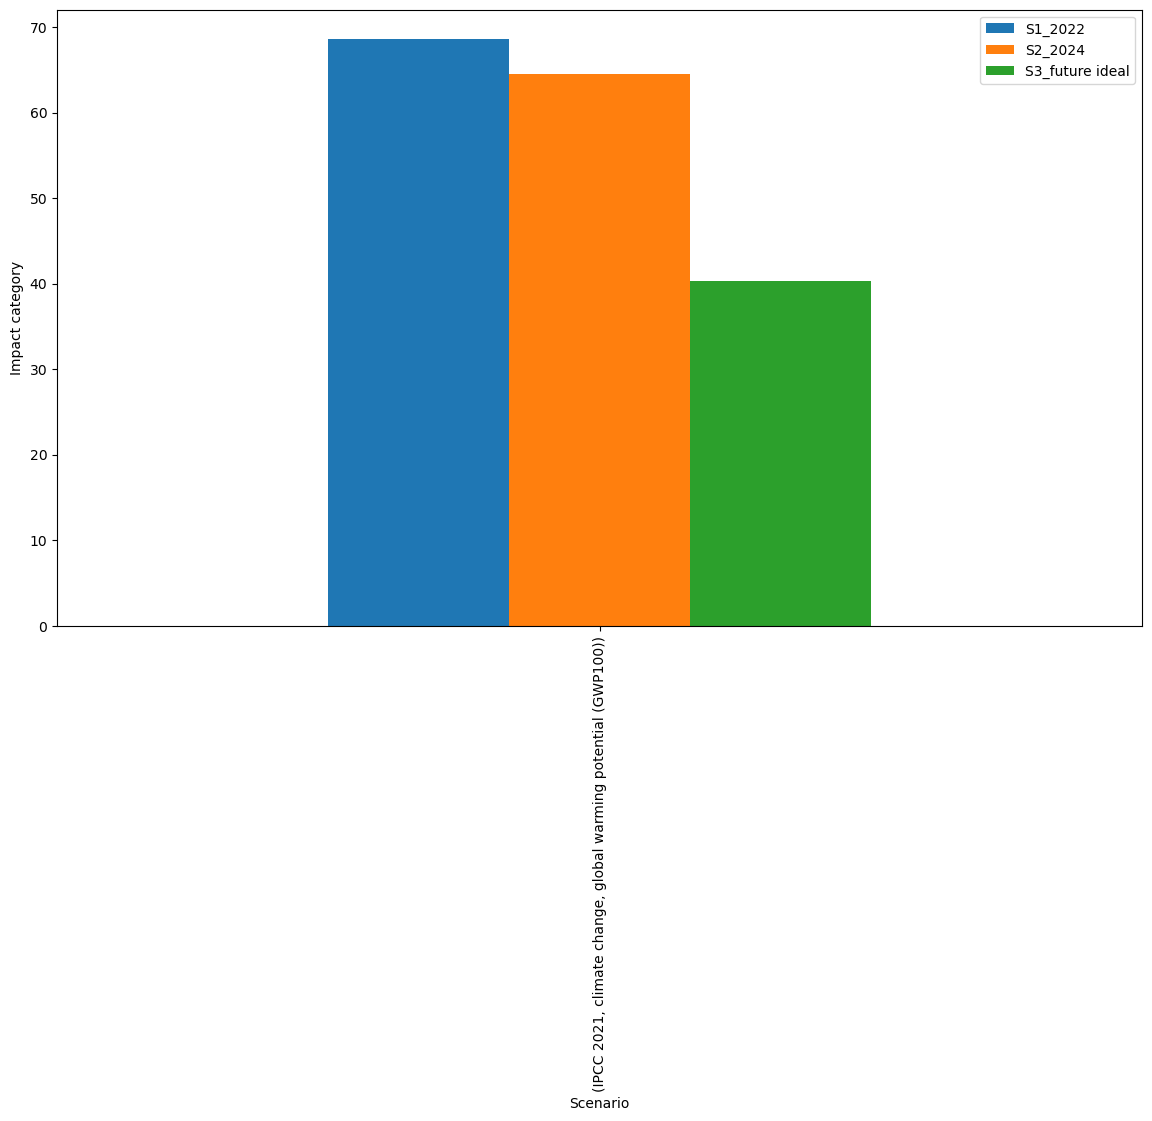

In [8]:
#bar shart with results for each category and scenario
mylcadf.plot.bar(
    xlabel='Scenario',
    ylabel='Impact category',
    figsize=(14,8)
)

# 6. Contribution analysis

Adapted from: 
https://github.com/massimopizzol/advanced-lca-notebooks/blob/main/Specific-bw-tasks/Contribution-analysis-foreground-by-activity.ipynb

6.1 Define activities

In [6]:
#if you want to use acts as the defined scenarios above
acts

('S1_2022' (tonne, CA-QC, None),
 'S2_2024' (tonne, CA-QC, None),
 'S3_future ideal' (tonne, CA-QC, None))

Or can define new 'acts' to compare now

In [13]:
#to compare individual facilities
Facilities =  bw.Database('OWM Facilities')
windrow1 = [a for a in Facilities if 'Composter_terrebonne' in a ['name']]
windrow2 = [a for a in Facilities if 'Composter_casselman' in a ['name']]
Closed = [a for a in Facilities if 'Closed_composter_city_final' in a ['name']]
AD = [a for a in Facilities if 'AD_city' in a ['name']]
landfill_terrebonne = [a for a in Facilities if 'Landfill_terrebonne_HOC' in a ['name']]
landfill3 = [a for a in Facilities if 'Landfill_lachute_HOC' in a ['name']]
acts = windrow1[0],windrow2[0],Closed[0],AD[0],landfill_terrebonne[0],landfill3[0]
acts

('Composter_terrebonne' (tonne, CA-QC, None),
 'Composter_casselman' (tonne, CA-QC, None),
 'Closed_composter_city_final' (tonne, CA-QC, None),
 'AD_city' (tonne, CA-QC, None),
 'Landfill_terrebonne_HOC' (tonne, CA-QC, None),
 'Landfill_lachute_HOC' (tonne, CA-QC, None))

In [28]:
# to compare different windrow composters
Facilities =  bw.Database('Infrastructure sensitivity')
terrebonne = [a for a in Facilities if 'Composter_terrebonne' in a ['name']]
ontario = [a for a in Facilities if 'Composter_casselman' in a ['name']]
st_michel = [a for a in Facilities if 'Composter_complexe enviro st Michel' in a ['name']]
st_thomas = [a for a in Facilities if 'Composter_saint thomas' in a ['name']]
acts = terrebonne[0], ontario[0], st_michel[0], st_thomas[0]

Contribution Analysis

In [6]:
# For the first activity in the list
act = bw.Database(acts[0]['database']).get(acts[0]['code'])
print(act)

'S1_2022' (tonne, CA-QC, None)


In [7]:
functional_unit = {act: 1} 
mymethod = mymethods[0]
lca = bw.LCA(functional_unit, mymethod)
lca.lci()
lca.lcia()
print(lca.score)

68.586755792244


In [8]:
def dolcacalc(act, mydemand, mymethod):
    my_fu = {act: mydemand} 
    lca = bw.LCA(my_fu, mymethod)
    lca.lci()
    lca.lcia()
    return lca.score

# For WtT
def getLCAresults(list_acts, mymethod):
    
    all_activities = []
    results = []
    for a in list_acts:
        act = bw.Database(a[0]).get(a[1])
        print(act)
        all_activities.append(act['name'])
        results.append(dolcacalc(act,1,mymethod)) # 1 stays for one unit of each process
        #print(act['name'])
     
    results_dict = dict(zip(all_activities, results))
    
    return results_dict

In [9]:
ca_dict = {}

for act in acts:
    
    exc_list = []
    contr_list = []

    for exc in list(act.exchanges()):
        
        if exc['type'] == 'biosphere':
            
            col = lca.activity_dict[exc['output']] # find column index of A matrix for the activity
            row = lca.biosphere_dict[exc['input']] # find row index of B matrix for the exchange
            contr_score = lca.biosphere_matrix[row,col] * lca.characterization_matrix[row,row]
            contr_list.append((exc['name'],exc['input'],exc['type'], exc['amount'], contr_score))
            
        elif exc['type'] == 'substitution':
            
            contr_score = dolcacalc(bw.Database(exc['input'][0]).get(exc['input'][1]), exc['amount'], mymethod)
            contr_list.append((exc['name'],exc['input'], exc['type'], exc['amount'], -contr_score))
            
        else:
            
            contr_score = dolcacalc(bw.Database(exc['input'][0]).get(exc['input'][1]), exc['amount'], mymethod)
            contr_list.append((exc['name'], exc['input'], exc['type'], exc['amount'], contr_score))
        
    ca_dict[act['name']] =  contr_list

In [10]:
getLCAresults(acts, mymethod)

'S1_2022' (tonne, CA-QC, None)
'S2_2024' (tonne, CA-QC, None)
'S3_future ideal' (tonne, CA-QC, None)


{'S1_2022': 68.586755792244,
 'S2_2024': 64.50288322083728,
 'S3_future ideal': 40.24983047245055}

In [10]:
#Check if sum of all exchanges equals the production impact for an activity
df = pd.DataFrame(ca_dict[acts[1]['name']], columns = ['name','input','type','amount','contribution'])
df

,name,input,type,amount,contribution
0,S2_2024,"(Scenarios, a7fcecda90cdf44e1670a80206cd267e)",production,1.000000,64.502883
1,Landfill_saint sophie_HOC,"(OWM Facilities, 44f60120320a5c8671b31a40b981f...",technosphere,0.169262,5.750141
2,Landfill_terrebonne_HOC,"(OWM Facilities, 93b5a70f68a512730247a3eeca34c...",technosphere,0.175307,5.718664
3,Landfill_st-nicephore_HOC,"(OWM Facilities, e9385ff15b9ac2e68c9aadc26851f...",technosphere,0.006045,0.775768
4,Landfill_cecile_de_milton_HOC,"(OWM Facilities, b95d92118a6df739e0eb64dcb53d9...",technosphere,0.018135,2.276420
5,Landfill_saint_thomas_HOC,"(OWM Facilities, f83a3f2af75c12d060714e31aeb12...",technosphere,0.229712,8.496060
6,Composter_casselman,"(OWM Facilities, eeb262dba20ea97b736f102578f01...",technosphere,0.031640,3.801442
7,Composter_complexe enviro st Michel,"(OWM Facilities, 52dbb59d7cef099d0fe5a7d558462...",technosphere,0.067234,7.190697
8,Composter_terrebonne,"(OWM Facilities, dfc455135f96be2fc69fe163de47a...",technosphere,0.059324,6.505026
9,Composter_saint thomas,"(OWM Facilities, 6f29bbf95a1b8057e9d45e90554d7...",technosphere,0.150288,17.135368


In [11]:
print(df.loc[df['type'] == 'production']['contribution'].sum())
print(df.loc[df['type'] != 'production']['contribution'].sum())

64.50288322083728
64.50288353480856


Print contribution tables

In [11]:
contribution_tables = {}  # Dictionary to store tables for each scenario

for act in acts:
    name = act['name']
    df = pd.DataFrame(ca_dict[name], columns=['name', 'input', 'type', 'amount', 'contribution'])

    # Calculate % contribution
    #production_total = df.loc[df['type'] == 'production', 'contribution'].sum()
    #df['%_contribution'] = 100 * df['contribution'] / production_total

    # Optional: sort by contribution or % if you want
    df = df.sort_values(by='contribution', ascending=False)

    # Save to dictionary
    contribution_tables[name] = df

    # Print or preview
    print(f"\n--- Contribution table for {name} ---")
    display(df.head(50))  # Show top 10 contributors (optional)


--- Contribution table for S1_2022 ---


,name,input,type,amount,contribution
0,S1_2022,"(Scenarios, 0cb49027448b59a9ca0d705af15352ca)",production,1.000000,68.586756
10,Composter_saint thomas,"(OWM Facilities, 6f29bbf95a1b8057e9d45e90554d7...",technosphere,0.156168,17.805848
3,Landfill_saint_thomas_HOC,"(OWM Facilities, f83a3f2af75c12d060714e31aeb12...",technosphere,0.248125,9.177052
7,Composter_casselman,"(OWM Facilities, eeb262dba20ea97b736f102578f01...",technosphere,0.076349,9.173210
8,Composter_complexe enviro st Michel,"(OWM Facilities, 52dbb59d7cef099d0fe5a7d558462...",technosphere,0.065938,7.052060
2,Landfill_terrebonne_HOC,"(OWM Facilities, 93b5a70f68a512730247a3eeca34c...",technosphere,0.208947,6.816040
9,Composter_terrebonne,"(OWM Facilities, dfc455135f96be2fc69fe163de47a...",technosphere,0.048586,5.327532
1,Landfill_saint sophie_HOC,"(OWM Facilities, 44f60120320a5c8671b31a40b981f...",technosphere,0.124062,4.214632
6,Landfill_cecile_de_milton_HOC,"(OWM Facilities, b95d92118a6df739e0eb64dcb53d9...",technosphere,0.026118,3.278511
4,Landfill_lachute_HOC,"(OWM Facilities, 0d4738c3dff15eb16ca260d229651...",technosphere,0.026118,3.228025



--- Contribution table for S2_2024 ---


,name,input,type,amount,contribution
0,S2_2024,"(Scenarios, a7fcecda90cdf44e1670a80206cd267e)",production,1.000000,64.502883
9,Composter_saint thomas,"(OWM Facilities, 6f29bbf95a1b8057e9d45e90554d7...",technosphere,0.150288,17.135368
5,Landfill_saint_thomas_HOC,"(OWM Facilities, f83a3f2af75c12d060714e31aeb12...",technosphere,0.229712,8.496060
7,Composter_complexe enviro st Michel,"(OWM Facilities, 52dbb59d7cef099d0fe5a7d558462...",technosphere,0.067234,7.190697
10,Closed_composter_city_final,"(OWM Facilities, a4c26be2828edf338b72e50546c5c...",technosphere,0.087009,6.853297
8,Composter_terrebonne,"(OWM Facilities, dfc455135f96be2fc69fe163de47a...",technosphere,0.059324,6.505026
1,Landfill_saint sophie_HOC,"(OWM Facilities, 44f60120320a5c8671b31a40b981f...",technosphere,0.169262,5.750141
2,Landfill_terrebonne_HOC,"(OWM Facilities, 93b5a70f68a512730247a3eeca34c...",technosphere,0.175307,5.718664
6,Composter_casselman,"(OWM Facilities, eeb262dba20ea97b736f102578f01...",technosphere,0.031640,3.801442
4,Landfill_cecile_de_milton_HOC,"(OWM Facilities, b95d92118a6df739e0eb64dcb53d9...",technosphere,0.018135,2.276420



--- Contribution table for S3_future ideal ---


,name,input,type,amount,contribution
0,S3_future ideal,"(Scenarios, 0457696b45f0d29fb9a85b802fda75c8)",production,1.000000,40.249830
6,Closed_composter_city_final,"(OWM Facilities, a4c26be2828edf338b72e50546c5c...",technosphere,0.179294,14.122247
5,Landfill_saint_thomas_HOC,"(OWM Facilities, f83a3f2af75c12d060714e31aeb12...",technosphere,0.229712,8.496060
1,Landfill_saint sophie_HOC,"(OWM Facilities, 44f60120320a5c8671b31a40b981f...",technosphere,0.169262,5.750141
2,Landfill_terrebonne_HOC,"(OWM Facilities, 93b5a70f68a512730247a3eeca34c...",technosphere,0.175307,5.718664
7,AD_city,"(OWM Facilities, 9b4a06dcebd1ead55bfafa108a0b2...",technosphere,0.215153,3.110530
4,Landfill_cecile_de_milton_HOC,"(OWM Facilities, b95d92118a6df739e0eb64dcb53d9...",technosphere,0.018135,2.276420
3,Landfill_st-nicephore_HOC,"(OWM Facilities, e9385ff15b9ac2e68c9aadc26851f...",technosphere,0.006045,0.775768


# 7.Display Monte Carlo Results as a Box and Whisker plot

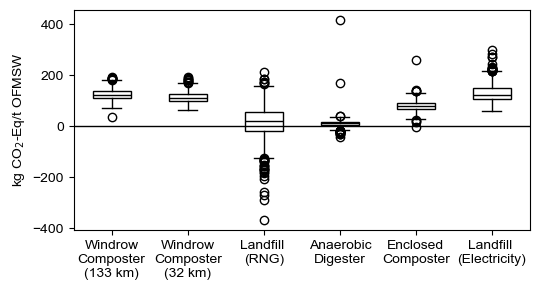

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font to Arial, size 10
plt.rc('font', family='Arial', size=10)

# Load the CSV file
df = pd.read_excel('monte carlo results facilities 1016.xlsx')

# Ensure there are exactly 3 columns
#if df.shape[1] != 3:
   # raise ValueError("Expected 3 columns in the CSV file.")
rename_map = {
    'Composter_terrebonne': 'Windrow Composter (32 km)',
    'Composter_casselman ': 'Windrow Composter (133 km)',
    'Closed_composter_city_final': 'Enclosed Composter',
    'AD_city': 'Anaerobic Digester',
    'Landfill_terrebonne_HOC': 'Landfill (RNG)',
    'Landfill_lachute_HOC': 'Landfill (Electricity)'
}
# Create the boxplot
plt.figure(figsize=(5.5, 3))
box = plt.boxplot([df[col] for col in df.columns], patch_artist=True, widths=0.5)

# Remove grid lines
plt.grid(False)

# Darken the horizontal line at y=0
plt.axhline(y=0, color='black', linewidth=1)

# Format column names with custom line breaks
labels = []
for col in df.columns:
    renamed = rename_map.get(col, col)  # Use mapped name if available
    label = renamed.replace("(", "\n(")  # Add line break before parentheses
    # Force line break for "Enclosed Composter"
    if renamed == "Enclosed Composter":
        label = "Enclosed\nComposter"
    if renamed == "Anaerobic Digester":
        label = "Anaerobic\nDigester"
    if renamed == "Windrow Composter (32 km)":
        label = "Windrow\nComposter\n(32 km)"
    if renamed == "Windrow Composter (133 km)":
        label = "Windrow\nComposter\n(133 km)"
    labels.append(label)


# Apply the formatted labels
plt.xticks(range(1, 7), labels)

# Set all boxplot elements to black and white
for element in ['boxes', 'whiskers', 'caps', 'medians', 'fliers']:
    for item in box[element]:
        item.set_color('black')

# Fill boxes with white
for patch in box['boxes']:
    patch.set_facecolor('white')

# Condense y-axis
#plt.ylim(-150, 450)  # Adjust based on your data
#plt.yticks(range(0, 201, 20))

# Add title and labels
#plt.title("Boxplot of 3 Scenarios")
plt.ylabel("kg CO$_{{2}}$-Eq/t OFMSW")

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


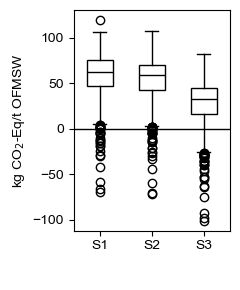

In [32]:
# Set global font to Arial, size 10
plt.rc('font', family='Arial', size=10)

# Load the CSV file
df = pd.read_excel('monte carlo results scenarios 1016.xlsx')

# Ensure there are exactly 3 columns
#if df.shape[1] != 3:
   # raise ValueError("Expected 3 columns in the CSV file.")
rename_map = {
    'S1': 'S1',
    'S2 ': 'S2',
    'S3': 'S3'
}
# Create the boxplot
plt.figure(figsize=(2.5, 3))
box = plt.boxplot([df[col] for col in df.columns], patch_artist=True, widths=0.5)

# Remove grid lines
plt.grid(False)

# Darken the horizontal line at y=0
plt.axhline(y=0, color='black', linewidth=1)

# Format column names with custom line breaks
labels = []
for col in df.columns:
    renamed = rename_map.get(col, col)  # Use mapped name if available
    label = renamed.replace("(", "\n(")  # Add line break before parentheses
    # Force line break for "Enclosed Composter"
    if renamed == "S1":
        label = "S1\n\n"
    if renamed == "S2":
        label = "S2\n\n"
    if renamed == "S3":
        label = "S3\n\n"
    labels.append(label)
# Apply the formatted labels
plt.xticks(range(1, 4), labels)

# Set all boxplot elements to black and white
for element in ['boxes', 'whiskers', 'caps', 'medians', 'fliers']:
    for item in box[element]:
        item.set_color('black')

# Fill boxes with white
for patch in box['boxes']:
    patch.set_facecolor('white')

# Condense y-axis
#plt.ylim(-150, 450)  # Adjust based on your data
#plt.yticks(range(0, 201, 20))

# Add title and labels
#plt.title("Boxplot of 3 Scenarios")
plt.ylabel("kg CO$_{{2}}$-Eq/t OFMSW")

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------------- ------------------------ 3.9/9.9 MB 21.3 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 21.3 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go

# Define nodes
labels = ["OFMSW : 300816",
    "Landfill : 196421",
    "Windrow composting : 104395"
]

# Define flows
source = [0,0]  # Both outputs come from Input
target = [1, 2]  # Output 1 and Output 2
values = [196421, 104395]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#BBBBBB","#BBBBBB","#BBBBBB"],  # Greyscale colors
        #font = dict
        #color=["#4CAF50", "#2196F3", "#FFC107"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        #color=["rgba(33,150,243,0.6)", "rgba(255,193,7,0.6)"]
    )
)])

#ig.update_layout(title_text="Sankey Diagram", font_size=10)

fig.update_layout(
    width=322fvg,  # 85 mm in pixels
    height=400, # adjust height as needed
    font=dict(size=10)
)

fig.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


<Figure size 335x200 with 0 Axes>

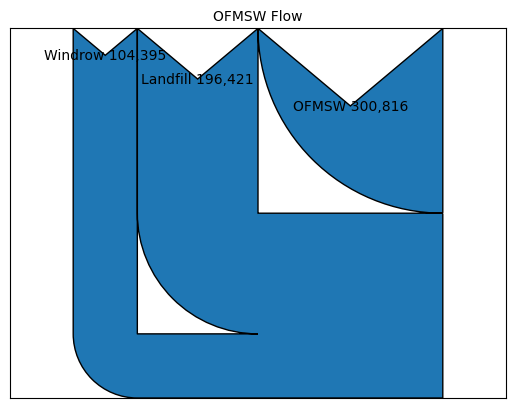

In [17]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Set figure size: 85 mm wide (~3.35 inches)
fig = plt.figure(figsize=(3.35, 2))  # width in inches, height adjusted for simplicity

# Create Sankey diagram
sankey = Sankey(flows=[300816, 196421, 104395],
                labels=['OFMSW 300,816', 'Landfill 196,421', 'Windrow 104,395'],
                orientations=[1, 1, 1],
                unit=None)

# Finish diagram
diagrams = sankey.finish()
plt.title('OFMSW Flow', fontsize=10)
plt.gca().set_facecolor('white')

# Adjust font size globally
for text in plt.gca().texts:
    text.set_fontsize(10)

# Save as PDF for journal submission
plt.savefig('simple_sankey.pdf', bbox_inches='tight')

